In [272]:
%matplotlib inline


In [273]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
font_size = 14
plt.rcParams.update({'font.size': font_size})

## DoublePendulum class and utility functions

In [274]:
class DoublePendulum():
    """
    Pendulum class implements the parameters and differential equation for 
    a pendulum using the notation from Taylor.
     
    Parameters:
     
    m1 : float
         mass attached to first pendulum
    
    m2 : float
         mass attached to second pendulum
         
    L1 : float
         length of first pendulum
    
    L2 : float
         length of second pendulum
         
    
    Methods:
    
    dy_dt(y, t)
     
    Returns the right side of the differential equation in vector y, 
    given time t and the corresponding value of y.
    """
           
    def __init__(self, m1=1.,m2=1., L1=1., L2=1.):
        self.m1=m1
        self.m2=m2
        self.L1=L1
        self.L2=L2
        self.g=1
            
    def dy_dt(self,y,t):
        
        """
        Returns right side of diffeq:
            [dphi_1/dt, dphi_2/dt, d^2phi_1/dt^2, d^2phi_2/dt^2]
        Parameters:
        
        y : float
            4 component vector with y[0]=phi_1, y[1]=phi_2, y[2]=dphi_1/dt,y[3]=dphi_2/dt
        t : float
            time
            """
        a=(self.m1 + self.m2)*self.L1**2
        b=self.m2*self.L1*self.L2*np.cos(y[0] - y[1])
        c=self.m2*self.L1*self.L2*np.cos(y[0] - y[1])
        d=self.m2*self.L2**2
        det_M=a*d - b*c
        A1=(-self.m2*self.L1*self.L2)*(y[3]**2)*np.sin(y[0]-y[1])-(self.m1 + self.m2)*self.g*self.L1*np.sin(y[0])
        A2=self.m2*self.L1*self.L2*(y[2]**2)*np.sin(y[0]-y[1])- self.m2*self.g*self.L2*np.sin(y[1])
               
        """
        Here a,b,c,d are the elements of the matrix, M, that we obtain from putting Lagrange's
        into matrix notation. M acts on the vector [d^2phi_1/dt^2, d^2phi_2/dt^2] and returns the vector [A1,A2]
        
        """
        
        
        return [y[2], y[3], (d*A1 - b*A2)/det_M, (-c*A1 + a*A2)/det_M ]


    def solve_ode(self, t, phi_1_0, phi_2_0, phi_1_dot_0, phi_2_dot_0, 
                  abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
             
        """
            
        y=[phi_1_0, phi_2_0, phi_1_dot_0, phi_2_dot_0]  
        phi_1, phi_2, phi_1_dot, phi_2_dot=odeint(self.dy_dt, y, t, 
                              atol=abserr, rtol=relerr).T
        return phi_1, phi_2, phi_1_dot, phi_2_dot

In [275]:
def start_stop_indices(t, plot_start, plot_stop):
    start_index=(np.fabs(t-plot_start)).argmin()  # index in t_pts array 
    stop_index=(np.fabs(t-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

t=np.arange(0,100,.01)

m1=1.
m2=1.
L1=1.
L2=1.

#initial conditions
phi_1_0=np.pi*.5
phi_2_0=np.pi
phi_1_dot_0=0
phi_2_dot_0=0

pendulum=DoublePendulum(m1,m2,L1,L2)
 
phi_1, phi_2, phi_1_dot, phi_2_dot=pendulum.solve_ode(t,phi_1_0,phi_2_0,phi_1_dot_0,phi_2_dot_0)

/Users/Crayfish/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


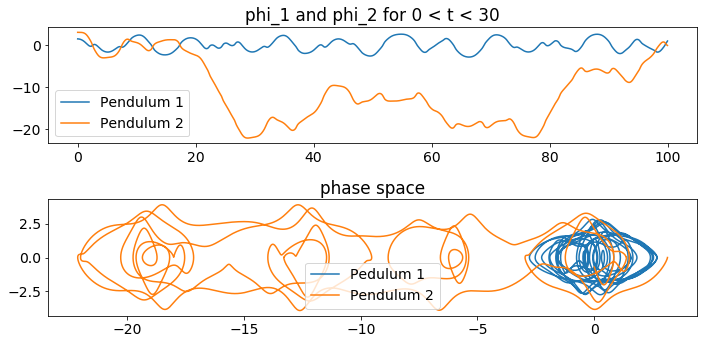

In [276]:
start, stop= start_stop_indices(t, 0, 100)


fig=plt.figure(figsize=(10,5))

ax1=fig.add_subplot(2,1,1)
ax1.plot(t[start:stop], phi_1[start:stop], label=('Pendulum 1'))
ax1.plot(t[start:stop], phi_2[start:stop], label=('Pendulum 2'))
ax1.legend()
ax1.set_title('phi_1 and phi_2 for 0 < t < 30')

ax2=fig.add_subplot(2,1,2)
ax2.plot(phi_1[start:stop], phi_1_dot[start:stop],  label=('Pedulum 1'))
ax2.plot(phi_2[start:stop], phi_2_dot[start:stop], label=('Pendulum 2'))
ax2.legend()
ax2.set_title('phase space')

fig.tight_layout()
fig.show()

In [277]:
""" 
Phase space does not appear to repeat, showing that the system is chaotic
"""

' \nPhase space does not appear to repeat, showing that the system is chaotic\n'

## Gravitational orbits

In [278]:
from scipy.integrate import odeint
font_size = 14
plt.rcParams.update({'font.size': font_size})

class Orbit:
    """
    Uses gravitational potential and associated differential equations for central force motion

    Parameters:
    
    m1: float
        mass of object 1
    m2: float
        mass of object 2; for part 2 m2>>m1
    
    """
    def __init__(self, m1, m2, G):
        self.m1=m1
        self.m2=m2
        self.G=G
    
    def dy_dt(self,r,t):
        """
        returns right side of diffeq
        """
        
        
        d=((r[0]-r[2])**2 + (r[1]-r[3])**2)**0.5
    

        x1_doubdot=(self.G / self.m2)*(r[0]-r[2])*(d**-3) 
        y1_doubdot=(self.G / self.m2)*(r[1]-r[3])*(d**-3) 
        x2_doubdot=(self.G / self.m1)*(r[2]-r[0])*(d**-3) 
        y2_doubdot=(self.G / self.m1)*(r[3]-r[1])*(d**-3) 
        
        """
        Above equations are obtained from Lagrange's equations
        """
        
        return [r[4],r[5],r[6],r[7], x1_doubdot, y1_doubdot, x2_doubdot, y2_doubdot]
    
    def solve_ode(self,t,r,abserr=1.0e-8, relerr=1.0e-8):
        
        r2=odeint(self.dy_dt, r, t, atol=abserr, rtol=relerr).T
        
        return r2

    

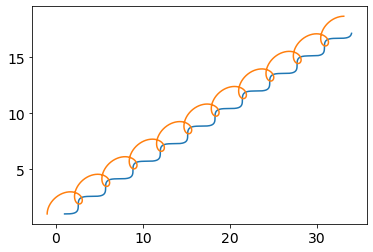

In [279]:
orbit=Orbit(m1=1., m2=2., G=-4.)
t=np.arange(0,50,.01)

#inital conditions
x1_0=1.
y1_0=1.
x2_0=-1.
y2_0=1.
x1dot_0=1.
y1dot_0=0.
x2dot_0=0.
y2dot_0=1.

r=[x1_0,y1_0,x2_0,y2_0,x1dot_0,y1dot_0,x2dot_0,y2dot_0]

#solve ode
r2=orbit.solve_ode(t, r)

#make plot
fig=plt.figure()
plt.plot(r2[0], r2[1])
plt.plot(r2[2], r2[3])

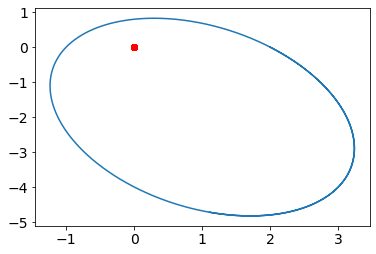

In [280]:
"""
Make plot for m2>>m1, in rest frame of m2. To obtain plot in rest frame we have 
subtract the m2 coordinate from all coordinate points.
"""

orbit2=Orbit(m1=1., m2=200000000., G=-3.)
t=np.arange(0,30,.01)

#inital conditions
x1_0=1.
y1_0=1.
x2_0=-1.
y2_0=1.
x1dot_0=1.
y1dot_0=0.
x2dot_0=0.
y2dot_0=1.

r=[x1_0,y1_0,x2_0,y2_0,x1dot_0,y1dot_0,x2dot_0,y2dot_0]

#solve ode
r2=orbit2.solve_ode(t, r)

#make plot
fig=plt.figure()
plt.plot(r2[0]-r2[2], r2[1]-r2[3])
plt.scatter(r2[2]-r2[2], r2[3]-r2[3],color='red')


In [281]:
"""
We see for m2>>m1 in the rest frame we can get an elliptical m1 orbit.
"""

'\nWe see for m2>>m1 in the rest frame we can get an elliptical m1 orbit.\n'